# Wisconsin Cancer dataset Forward and Backward feature selection for the classification with Logistic Regression


### Here is the layout of the dataset
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (0 for benign, 1 for malignant)




### Loading the dataset into arrays:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel (r'Wisconsin Cancer DATASET.xlsx')

x1 = data.iloc[:, 1].values.tolist() 
x1 = np.array(x1) 
x1 = np.reshape(x1,(682,1))

x2 = data.iloc[:, 2].values.tolist() 
x2 = np.array(x2) 
x2 = np.reshape(x2,(682,1))

x3 = data.iloc[:, 3].values.tolist() 
x3 = np.array(x3) 
x3 = np.reshape(x3,(682,1))

x4 = data.iloc[:, 4].values.tolist() 
x4 = np.array(x4) 
x4 = np.reshape(x4,(682,1))

x5 = data.iloc[:, 5].values.tolist() 
x5 = np.array(x5) 
x5 = np.reshape(x5,(682,1))

x6 = data.iloc[:, 6].values.tolist() 
x6 = np.array(x6) 
x6 = np.reshape(x6,(682,1))

x7 = data.iloc[:, 7].values.tolist() 
x7 = np.array(x7)
x7 = np.reshape(x7,(682,1)) 

x8 = data.iloc[:, 8].values.tolist() 
x8 = np.array(x8) 
x8 = np.reshape(x8,(682,1))

x9 = data.iloc[:, 9].values.tolist() 
x9 = np.array(x9) 
x9 = np.reshape(x9,(682,1))

Y = data.iloc[:, 10].values.tolist() 
Y = np.array(Y)
Y = np.reshape(Y,(682,1))


X = np.stack((x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=1)
X = np.reshape(X,(682,9))

### Setting up the logistic regression model and prepping preliminary functions for BFS and FFS

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

def acc(xx):
	X_train,X_test,y_train,y_test=train_test_split(xx,Y,test_size=0.25,random_state=0)
	model.fit(X_train,y_train)
	score = model.score(X_test, y_test)
	return score

def maxpo(l):
    maxvalue = max(l)
    maxpos = l.index(maxvalue)
    return maxpos

<img src="1 bfs.png">

In [11]:
j=0
pred = 0
F = np.stack((x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=1)
F = np.reshape(X,(682,9))

while (j<9):
	scores11=[]
	for i in range(F.shape[1]):
		FF = F
		FF = np.delete(FF,i,1)
		sc11 = acc(FF)
		scores11.append(sc11)

	pos = maxpo(scores11)
	F = np.delete(FF,pos,1)
	cur = max(scores11)
	if ( (cur-pred)>0 ):
		pred = cur
	else:
		break
	j = j+1

rX_train11,rX_test11,ry_train11,ry_test11=train_test_split(F,Y,test_size=0.25,random_state=0)
model.fit(rX_train11,ry_train11)
accuracy11 = model.score(rX_test11, ry_test11)
print("Optimised accuracy for BFS is ")
print(accuracy11)

print("The chosen optimal feature columns (according to BFS) are")
print(F)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Optimised accuracy for BFS is 
0.9649122807017544
The chosen optimal feature columns (according to BFS) are
[[ 5  7 10]
 [ 3  2  2]
 [ 6  3  4]
 ...
 [ 5  7  3]
 [ 4  3  4]
 [ 4  4  5]]


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Replicating the output of BFS here:
<img src="2 bfs.png">

## Those feature columns above correspond to 
### * Clump Thickness 
### * Single Epithelial Cell Size
### * Bare Nuclei. 

<img src="1 ffs.png">

In [7]:
i=0
unus=[x1,x2,x3,x4,x5,x6,x7,x8,x9]
us=[]
scores1 = []

for i in unus:
	sc1 = acc(i)
	scores1.append(sc1)

popp1 = maxpo(scores1)
us=unus.pop(popp1)

j=0
pred1 = 0
while (j<8):
	scores = []
	for k in unus:
		sc = acc( np.concatenate( (us,k), axis=1 ) )
		scores.append(sc)
	popp = maxpo(scores)
	us = np.concatenate( (us, unus.pop(popp)), axis=1 )
	cur1 = max(scores)
	if ( (cur1-pred1)>0 ):
		pred1 = cur1
	else:
		break
	j = j+1

rX_train,rX_test,ry_train,ry_test=train_test_split(us,Y,test_size=0.25,random_state=0)
model.fit(rX_train,ry_train)
accuracy = model.score(rX_test, ry_test)
print("Optimised acuracy for FFS is ")
print(accuracy)

print("The chosen optimal feature subset (according to FFS) is")
print(us)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Optimised acuracy for FFS is 
0.9649122807017544
The chosen optimal feature subset (according to FFS) is
[[ 4 10  4]
 [ 1  2  1]
 [ 8  4  8]
 ...
 [10  3 10]
 [ 8  4  6]
 [ 8  5  8]]


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Replicating the output of FFS here:
<img src="2 ffs.png">

## Those feature columns above correspond to 
### * Uniformity of Cell Size
### * Uniformity of Cell Shape
### * Bare Nuclei

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

### Now I am going to train the logistic regression model with all 10 features to obejctively evaluate our gains

In [8]:
aaX_train,aaX_test,aaY_train,aaY_test=train_test_split(X,Y,test_size=0.25,random_state=0)
model.fit(aaX_train,aaY_train)
accuracy_full = model.score(aaX_test, aaY_test)
print("Optimised accuracy with all 10 features is ")
print(accuracy_full)

Optimised accuracy with all 10 features is 
0.9707602339181286


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

## Here i am using a barchart to compare our results and gains

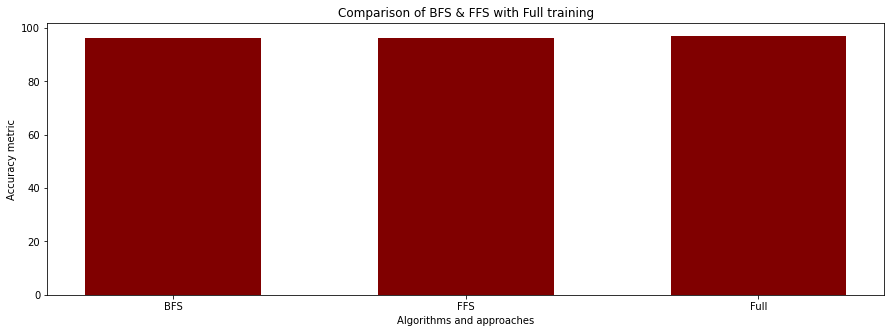

In [18]:
analysis = {'BFS': accuracy11*100, 'FFS': accuracy*100, 'Full': accuracy_full*100}
algo = list(analysis.keys())
values = list(analysis.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(algo, values, color ='maroon',
        width = 0.6)
 
plt.xlabel("Algorithms and approaches")
plt.ylabel("Accuracy metric")
plt.title("Comparison of BFS & FFS with Full training")
plt.show()